In [1]:
import time
import subprocess as subp

import matplotlib.pyplot as plt
import numpy as np

In [2]:
content = []
with open("./samples/pattern.txt", "r") as f:
    content = f.readline()

pattern = content[:8]

text_file_list = ["samples/dna.50MB", "samples/dna.100MB", "samples/dna.200MB", "samples/dna"]

x = [50, 100, 200, 400]

In [3]:
y_shiftor = []
y_boyer = []
y_grep = []

for text_file in text_file_list:

    t1 = time.time()
    subp.check_call(["pmt", "-l", "-a", "shiftor", pattern, text_file])
    t2 = time.time()
    y_shiftor.append(t2 - t1)

    t1 = time.time()
    subp.check_call(["pmt", "-l", "-a", "boyermoore", pattern, text_file])
    t2 = time.time()
    y_boyer.append(t2 - t1)

    t1 = time.time()
    subp.check_call(["grep", "-c", pattern, text_file])
    t2 = time.time()
    y_grep.append(t2 - t1)

The pattern GATCAATG was found in 230 lines in the given text.
The pattern GATCAATG occurred in 230 lines of the given text.
230
The pattern GATCAATG was found in 450 lines in the given text.
The pattern GATCAATG occurred in 450 lines of the given text.
450
The pattern GATCAATG was found in 863 lines in the given text.
The pattern GATCAATG occurred in 863 lines of the given text.
863
The pattern GATCAATG was found in 1396 lines in the given text.
The pattern GATCAATG occurred in 1396 lines of the given text.
1396


In [11]:
y_wumanber = []
y_sellers = []

for text_file in text_file_list:

    t1 = time.time()
    subp.check_call(["pmt", "-c", "-a", "wumanber", "-e", "1", pattern, text_file])
    t2 = time.time()
    y_wumanber.append(t2 - t1)

    t1 = time.time()
    subp.check_call(["pmt", "-c", "-a", "sellers", "-e", "1", pattern, text_file])
    t2 = time.time()
    y_sellers.append(t2 - t1)

The pattern GATCAATG occurred (with a maximum edit cost of 1) 40196 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 40188 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 81515 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 81493 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 166528 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 166484 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 306228 times in the given text.
The pattern GATCAATG occurred (with a maximum edit cost of 1) 306170 times in the given text.


In [12]:
y_agrep = []

for text_file in text_file_list:
    t1 = time.time()
    subp.check_call(["agrep", "-c", "-1", pattern, text_file])
    t2 = time.time()
    y_agrep.append(t2 - t1)

24382
48777
96516
171437


In [13]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

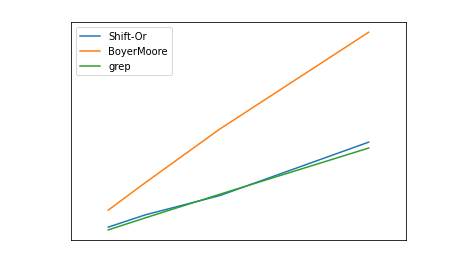

In [14]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y_shiftor, label='Shift-Or')
ax.plot(x, y_boyer, label='BoyerMoore')
ax.plot(x, y_grep, label='grep')

ax.set(xlim=(0, 450), xticks=np.arange(50, 450, 50))

plt.title("Eficiência dos algoritmos de busca exata de acordo com o tamanho do texto")
plt.xlabel("Tamanho do arquivo em MBs")
plt.ylabel("Tempo de execução")

plt.legend(labelcolor='black', loc='best')
plt.show()

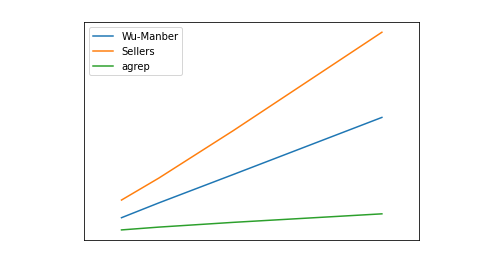

In [15]:
# plot
fig, ax = plt.subplots()

ax.plot(x, y_wumanber, label='Wu-Manber')
ax.plot(x, y_sellers, label='Sellers')
ax.plot(x, y_agrep, label='agrep')

ax.set(xlim=(0, 450), xticks=np.arange(50, 450, 50))

plt.title("Eficiência dos algoritmos de busca aproximada de acordo com tamanho do texto")

plt.xlabel("Tamanho do arquivo em MBs")
plt.ylabel("Tempo de execução")

plt.legend(labelcolor='black', loc='best')
plt.show()